In [1]:
from netCDF4 import Dataset
import numpy as np
import math as Math
import matplotlib as mplt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

np.set_printoptions(suppress=True) 

#解决plot画图无法显示中文的问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题  

In [2]:
#坐标系转换

a = 6378137;
f = 0.0034;
b = 6.3568e6;
e = Math.sqrt((Math.pow(a, 2) - Math.pow(b, 2)) / Math.pow(a, 2));
e2 = Math.sqrt((Math.pow(a, 2) - Math.pow(b, 2)) / Math.pow(b, 2));

def ecf2lla(x, y, z) :

    np.set_printoptions(suppress=True) 
    x = x*1000
    y = y*1000
    z = z*1000
    
    p = Math.sqrt(Math.pow(x, 2) + Math.pow(y, 2));

    theta = Math.atan((z * a) / (p * b));

    lon = Math.atan(y / x);

    lat = Math.atan(((z + Math.pow(e2, 2) * b * Math.pow(Math.sin(theta), 3)) / ((p - Math.pow(e, 2) * a * Math.pow(Math.cos(theta), 3)))));
    
    N = a / (Math.sqrt(1 - (Math.pow(e, 2) * Math.pow(Math.sin(lat), 2))));

    m = (p / Math.cos(lat));
    
    height = m - N;


    lon = lon * 180 / Math.pi;
    lat = lat * 180 / Math.pi; 
    
    return lat,lon,height


In [3]:
name = [
    ("podTec\podTec_C001.2011.091.00.55.0018.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.17.0025.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.03.49.0026.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.26.0022.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.53.0012.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.10.0025.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.09.48.0022.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.27.0016.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.44.0012.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.04.0024.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.15.37.0027.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.17.11.0020.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.44.0012.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.01.0023.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.21.34.0023.G02.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.23.11.0020.G02.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.01.09.0027.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.57.0027.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.49.0035.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.07.03.0028.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.50.0026.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.42.0023.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.55.0026.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.40.0029.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.34.0023.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.53.0024.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.33.0029.G03.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.24.0030.G03.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.40.0024.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.12.0025.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.03.46.0022.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.35.0023.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.05.0026.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.09.48.0018.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.16.0013.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.28.0023.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.13.58.0026.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.15.34.0024.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.31.0015.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.19.53.0026.G04.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.21.29.0024.G04.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.01.13.0014.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.34.0023.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.04.0026.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.36.0024.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.07.00.0021.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.25.0025.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.09.58.0027.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.30.0025.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.13.03.0012.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.19.0025.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.15.51.0026.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.17.24.0025.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.47.0022.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.13.0025.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.21.46.0023.G05.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.23.18.0024.G05.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.01.11.0028.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.55.0030.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.55.0026.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.07.05.0027.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.48.0029.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.47.0016.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.13.0013.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.13.01.0024.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.41.0030.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.37.0034.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.56.0022.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.37.0026.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.26.0024.G06.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.53.0011.G06.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.51.0028.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.41.0031.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.44.0031.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.40.0032.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.34.0033.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.35.0032.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.36.0028.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.26.0033.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.26.0033.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.25.0032.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.19.0033.G07.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.19.0032.G07.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.40.0032.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.36.0030.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.31.0030.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.32.0030.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.29.0031.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.25.0030.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.24.0031.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.20.0031.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.15.0019.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.39.0010.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.16.0033.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.13.0031.G08.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.11.0030.G08.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.04.0031.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.01.59.0032.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.00.0031.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.58.0029.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.07.52.0031.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.09.54.0032.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.49.0031.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.13.43.0033.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.15.45.0032.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.17.44.0028.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.19.36.0033.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.21.38.0033.G09.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.23.33.0032.G09.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.52.0025.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.25.0026.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.03.58.0025.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.27.0017.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.47.0025.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.19.0026.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.09.52.0019.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.24.0010.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.41.0020.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.13.0026.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.15.46.0024.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.17.14.0014.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.34.0025.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.07.0025.G10.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.21.39.0026.G10.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.25.0027.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.03.13.0017.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.41.0027.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.23.0023.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.09.07.0020.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.37.0024.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.12.0027.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.15.09.0013.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.30.0025.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.08.0024.G11.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.31.0018.G11.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.01.50.0032.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.03.47.0030.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.42.0034.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.07.42.0033.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.09.42.0028.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.34.0034.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.13.34.0033.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.15.32.0026.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.17.27.0033.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.19.27.0033.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.21.24.0032.G12.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.23.19.0034.G12.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.56.0028.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.45.0015.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.12.0023.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.49.0028.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.36.0026.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.05.0010.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.15.0012.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.43.0027.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.29.0019.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.59.0022.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.36.0027.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.21.0029.G13.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.52.0022.G13.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.01.44.0029.G14.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.03.29.0029.G14.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.07.41.0025.G14.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.09.22.0031.G14.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.13.31.0028.G14.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.15.15.0030.G14.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.19.24.0028.G14.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.21.08.0030.G14.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.04.0030.G15.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.16.0027.G15.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.57.0030.G15.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.09.0028.G15.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.51.0029.G15.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.41.0011.G15.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.03.0027.G15.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.17.44.0029.G15.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.21.56.0028.G15.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.23.37.0030.G15.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.01.07.0033.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.03.05.0031.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.01.0034.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.59.0032.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.55.0033.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.57.0030.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.52.0033.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.51.0029.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.49.0031.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.45.0032.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.39.0033.G16.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.42.0030.G16.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.22.0028.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.02.06.0030.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.34.0022.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.15.0029.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.07.58.0031.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.29.0025.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.08.0028.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.13.52.0030.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.20.0018.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.01.0028.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.19.46.0029.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.19.0021.G17.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.23.55.0027.G17.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.01.33.0026.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.03.04.0025.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.53.0025.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.07.26.0027.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.58.0021.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.20.0022.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.11.47.0022.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.13.19.0027.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.52.0025.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.26.0010.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.17.41.0024.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.19.13.0027.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.46.0010.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.55.0013.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.08.0020.G18.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.23.34.0025.G18.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.02.53.0028.G19.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.04.41.0026.G19.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.07.17.0012.G19.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.47.0028.G19.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.29.0030.G19.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.14.44.0024.G19.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.22.0030.G19.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.19.05.0016.G19.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.20.34.0027.G19.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.15.0029.G19.01_2013.3520_nc"),
    ("podTec\podTec_C001.2011.091.00.39.0026.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.03.33.0020.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.05.00.0025.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.06.32.0024.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.08.10.0014.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.10.53.0025.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.12.26.0026.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.13.59.0013.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.15.22.0019.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.16.49.0023.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.18.21.0025.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.19.55.0018.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.21.15.0019.G20.01_2013.3520_nc",
"podTec\podTec_C001.2011.091.22.43.0023.G20.01_2013.3520_nc")
]

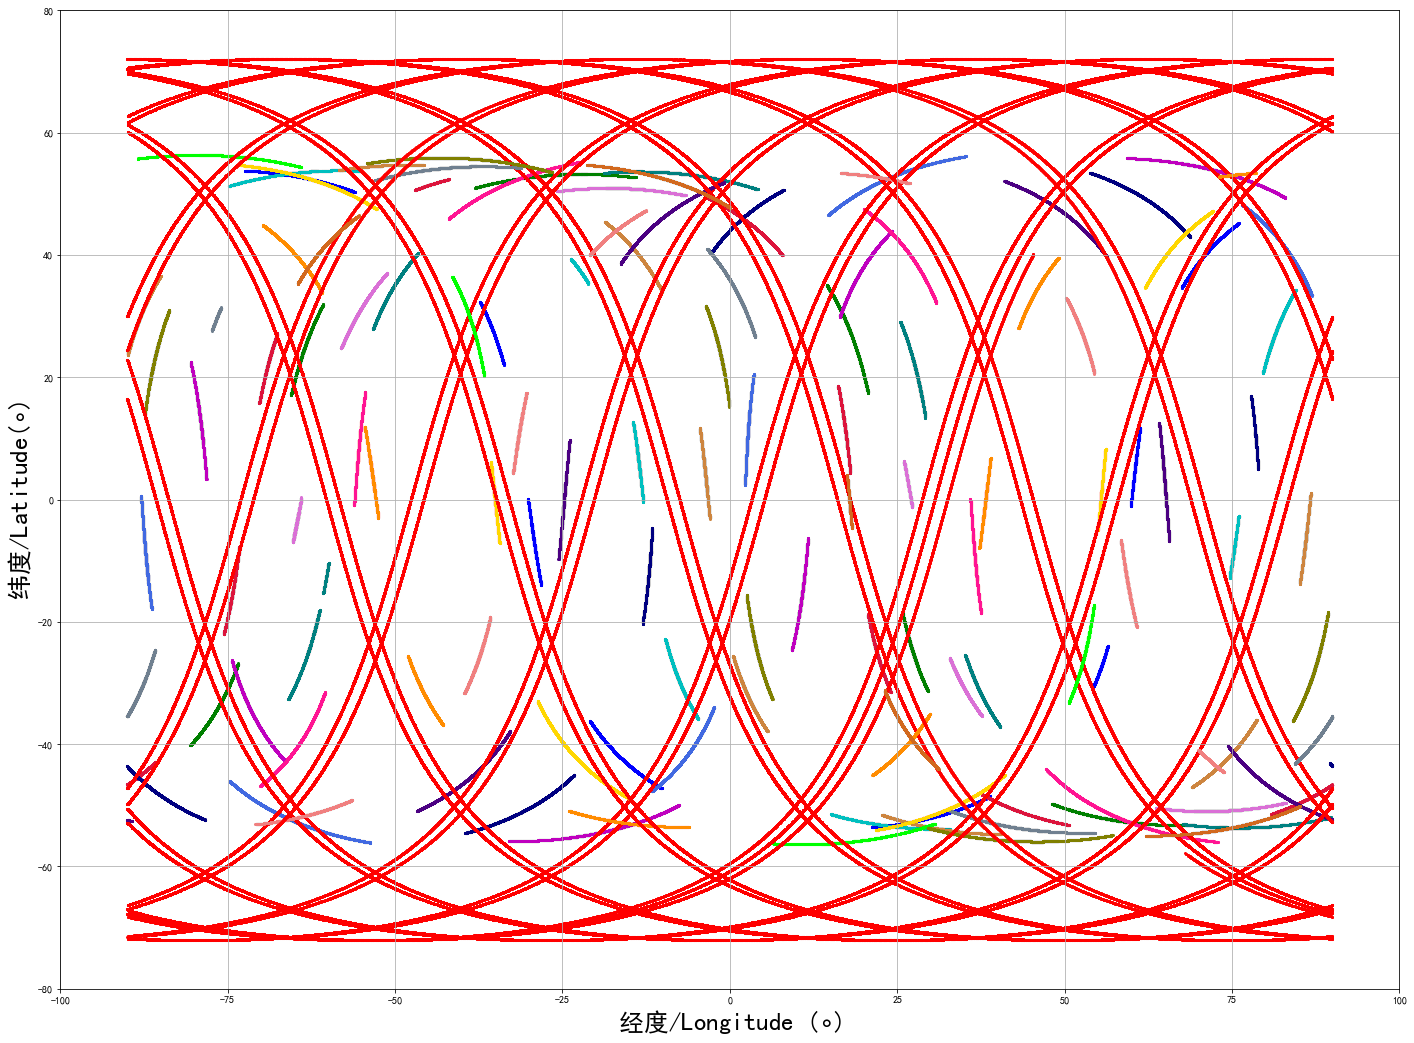

In [5]:
plt.figure(figsize=(24,18))
#绘制一组LEO-GPS轨迹图



#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[0])):
    nc1 = Dataset(name[0][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='b',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)




#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[1])):
    nc1 = Dataset(name[1][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='g',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[2])):
    nc1 = Dataset(name[2][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='c',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[3])):
    nc1 = Dataset(name[3][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='peru',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[4])):
    nc1 = Dataset(name[4][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='teal',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[5])):
    nc1 = Dataset(name[5][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='m',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[6])):
    nc1 = Dataset(name[6][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='royalblue',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[7])):
    nc1 = Dataset(name[7][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='deeppink',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[8])):
    nc1 = Dataset(name[8][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='crimson',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[9])):
    nc1 = Dataset(name[9][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='orchid',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[10])):
    nc1 = Dataset(name[10][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='indigo',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[11])):
    nc1 = Dataset(name[11][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='navy',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[12])):
    nc1 = Dataset(name[12][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='lime',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    
    
            
 

#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[13])):
    nc1 = Dataset(name[13][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='slategray',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[14])):
    nc1 = Dataset(name[14][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='olive',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    
 

#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[15])):
    nc1 = Dataset(name[15][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='gold',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[16])):
    nc1 = Dataset(name[16][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='darkorange',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[17])):
    nc1 = Dataset(name[17][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='chocolate',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    


#绘制一组LEO-GPS轨迹图
for j in np.arange(len(name[18])):
    nc1 = Dataset(name[18][j])
    
    x = nc1.variables['x_GPS']
    y = nc1.variables['y_GPS']
    z = nc1.variables['z_GPS']
    xl = nc1.variables['x_LEO']
    yl = nc1.variables['y_LEO']
    zl = nc1.variables['z_LEO']
    
    idex = int(x.size) #-1
    
    lo = np.empty(idex)
    la = np.empty(idex)
    al = np.empty(idex)
    lol = np.empty(idex)
    lal = np.empty(idex)
    all = np.empty(idex)
   
    
    
    for i in np.arange(0,idex,1):
        (lal[i],lol[i],all[i]) = ecf2lla(xl[i],yl[i],zl[i])
        (la[i],lo[i],al[i]) = ecf2lla(x[i],y[i],z[i])
   
    plt.scatter(lo,la,color='lightcoral',marker='.',linewidths=0.01)
    plt.scatter(lol,lal,color='r',marker='.',linewidths=0.01)
    
    
  
    
    
plt.xlim(-100 ,100 )
plt.ylim(-80 ,80 )   
plt.xlabel('经度/Longitude ($\circ$)',fontsize=25)
plt.ylabel('纬度/Latitude($\circ$)',fontsize=25)
plt.grid(True)